<a href="https://colab.research.google.com/github/stephintoto/election-prediction/blob/main/elec_myver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
election_data = pd.read_csv('us election.csv')

In [ ]:
election_data.head()

,candidate,date,state,cycle,party,pct_estimate,hi,lo
0,Trump,12-09-2024,Arizona,2024,REP,46.15125,47.713017,44.562177
1,Harris,12-09-2024,Arizona,2024,DEM,45.55990,47.205613,43.831088
2,Trump,11-09-2024,Arizona,2024,REP,46.21710,47.876045,44.674330
3,Harris,11-09-2024,Arizona,2024,DEM,45.44870,47.142852,43.790568
4,Trump,10-09-2024,Arizona,2024,REP,46.24450,47.917710,44.695253


In [ ]:
election_data['date'] = pd.to_datetime(election_data['date'], format='%d-%m-%Y')

In [ ]:
print("Missing values in each column:")
print(election_data.isnull().sum())


Missing values in each column:
candidate       0
date            0
state           0
cycle           0
party           0
pct_estimate    0
hi              0
lo              0
dtype: int64


In [ ]:
election_data = election_data.drop_duplicates()

In [ ]:
print(election_data[['pct_estimate', 'hi', 'lo']].describe())

       pct_estimate           hi           lo
count   5801.000000  5801.000000  5801.000000
mean      32.000752    34.377131    29.634498
std       15.891093    15.824799    15.980549
min        2.852455     4.606868     1.019715
25%        9.936730    12.638103     7.574293
50%       40.275600    42.503813    37.991815
75%       43.950600    46.100768    41.789752
max       58.459400    61.237423    56.193795


In [ ]:
invalid_estimates = election_data[(election_data['pct_estimate'] < election_data['lo']) |
                                  (election_data['pct_estimate'] > election_data['hi'])]

In [ ]:
if not invalid_estimates.empty:
    print("Invalid pct_estimates found:")
    print(invalid_estimates)

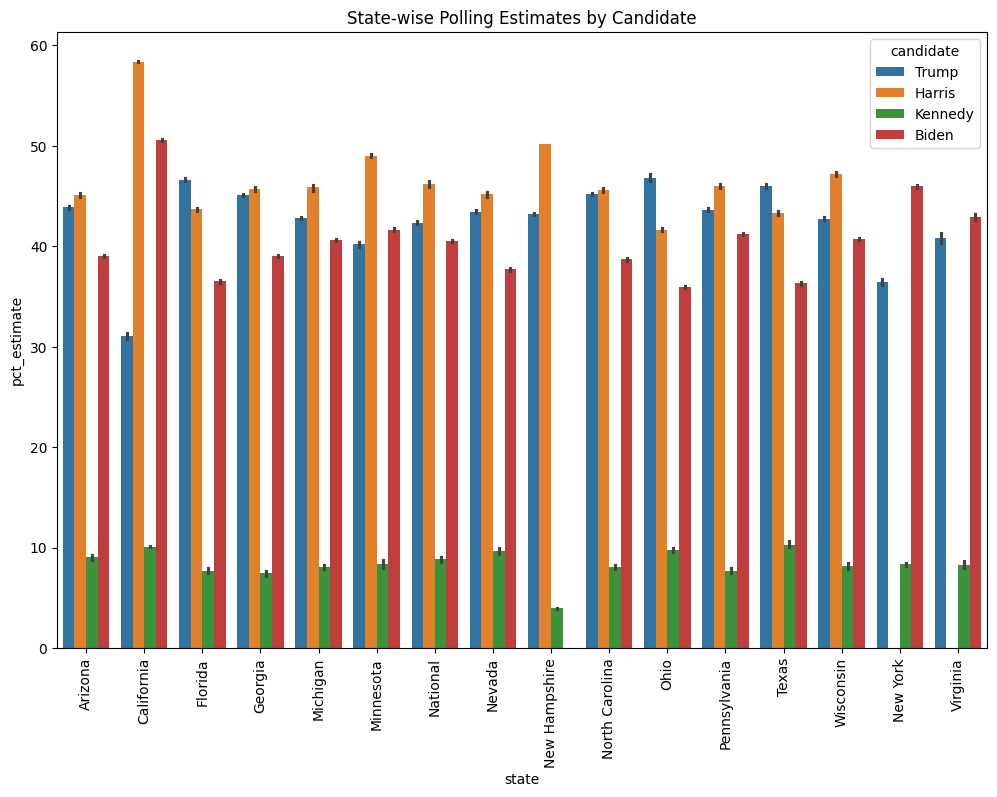

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=election_data, x='state', y='pct_estimate', hue='candidate')
plt.title('State-wise Polling Estimates by Candidate')
plt.xticks(rotation=90)
plt.show()

In [ ]:

# Remove entries for 'Kennedy'
election_data = election_data[election_data['candidate'] != 'Kennedy']

# Optional: Display the updated dataset to confirm changes
print("Candidates remaining after removal of Kennedy:")
print(election_data['candidate'].value_counts())

# Save the updated dataset to a new CSV file
election_data.to_csv('updated_us_election.csv', index=False)


Candidates remaining after removal of Kennedy:
candidate
Trump     2016
Biden     1568
Harris     448
Name: count, dtype: int64


In [ ]:
election_data.shape

(4032, 8)

In [ ]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4032 entries, 0 to 5800
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   candidate     4032 non-null   object        
 1   date          4032 non-null   datetime64[ns]
 2   state         4032 non-null   object        
 3   cycle         4032 non-null   int64         
 4   party         4032 non-null   object        
 5   pct_estimate  4032 non-null   float64       
 6   hi            4032 non-null   float64       
 7   lo            4032 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 283.5+ KB


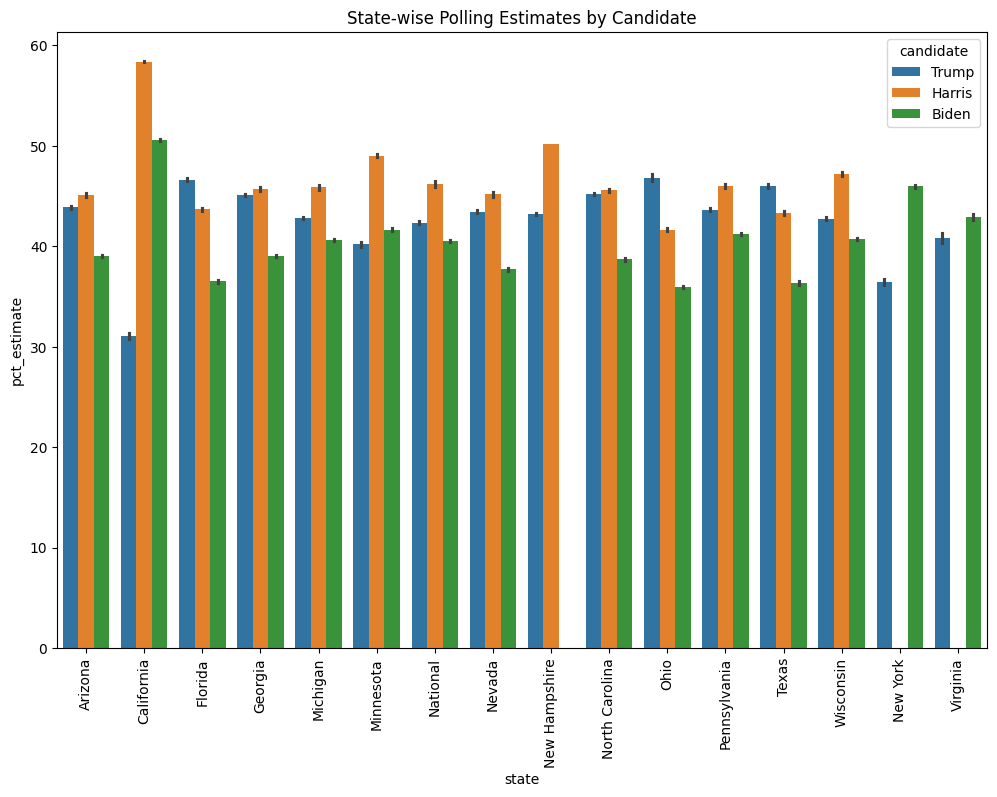

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=election_data, x='state', y='pct_estimate', hue='candidate')
plt.title('State-wise Polling Estimates by Candidate')
plt.xticks(rotation=90)
plt.show()

Outliers in pct_estimate: 95
Outliers in hi (upper bound): 92
Outliers in lo (lower bound): 95


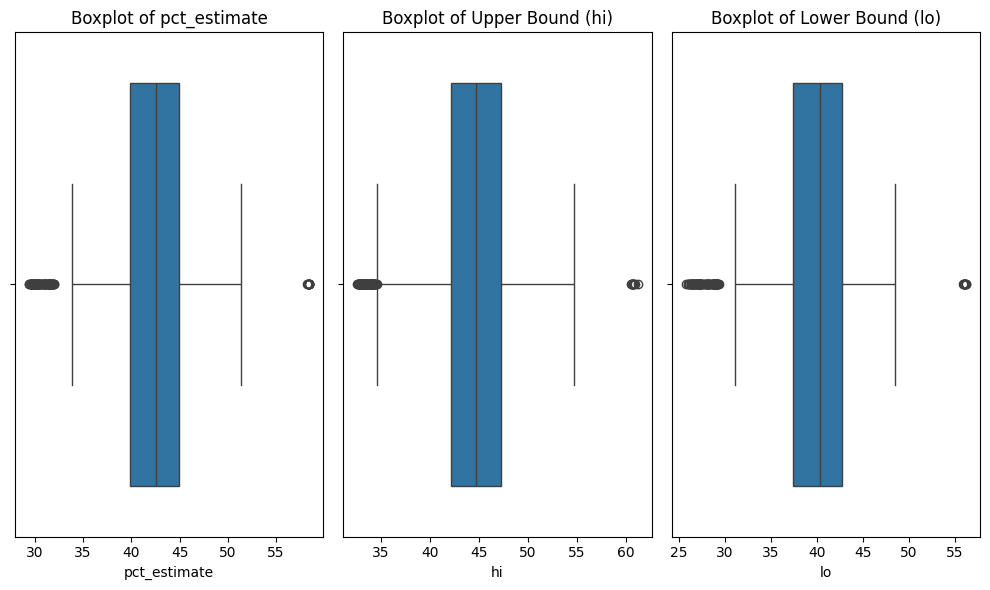

In [ ]:
# Step 1: Identify outliers using IQR (Interquartile Range) method

# Define a function to detect outliers
def find_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in 'pct_estimate'
outliers_pct_estimate = find_outliers_IQR(election_data, 'pct_estimate')
print(f"Outliers in pct_estimate: {len(outliers_pct_estimate)}")

# Detect outliers in 'hi' (upper bound estimates)
outliers_hi = find_outliers_IQR(election_data, 'hi')
print(f"Outliers in hi (upper bound): {len(outliers_hi)}")

# Detect outliers in 'lo' (lower bound estimates)
outliers_lo = find_outliers_IQR(election_data, 'lo')
print(f"Outliers in lo (lower bound): {len(outliers_lo)}")

# visualisation

import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots to visualize outliers
plt.figure(figsize=(10, 6))

# Boxplot for pct_estimate
plt.subplot(1, 3, 1)
sns.boxplot(data=election_data, x='pct_estimate')
plt.title('Boxplot of pct_estimate')

# Boxplot for hi (upper bound)
plt.subplot(1, 3, 2)
sns.boxplot(data=election_data, x='hi')
plt.title('Boxplot of Upper Bound (hi)')

# Boxplot for lo (lower bound)
plt.subplot(1, 3, 3)
sns.boxplot(data=election_data, x='lo')
plt.title('Boxplot of Lower Bound (lo)')

plt.tight_layout()
plt.show()




In [ ]:
election_day = pd.to_datetime('2024-11-05')  # Update with actual election day
election_data['days_until_election'] = (election_day - election_data['date']).dt.days


In [ ]:
election_data.head()

,candidate,date,state,cycle,party,pct_estimate,hi,lo,days_until_election
0,Trump,2024-09-12,Arizona,2024,REP,46.15125,47.713017,44.562177,54
1,Harris,2024-09-12,Arizona,2024,DEM,45.55990,47.205613,43.831088,54
2,Trump,2024-09-11,Arizona,2024,REP,46.21710,47.876045,44.674330,55
3,Harris,2024-09-11,Arizona,2024,DEM,45.44870,47.142852,43.790568,55
4,Trump,2024-09-10,Arizona,2024,REP,46.24450,47.917710,44.695253,56


In [ ]:
election_data['poll_7day_avg'] = election_data.groupby(['state', 'candidate'])['pct_estimate'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())


In [ ]:
election_data.head()

,candidate,date,state,cycle,party,pct_estimate,hi,lo,days_until_election,poll_7day_avg
0,Trump,2024-09-12,Arizona,2024,REP,46.15125,47.713017,44.562177,54,46.151250
1,Harris,2024-09-12,Arizona,2024,DEM,45.55990,47.205613,43.831088,54,45.559900
2,Trump,2024-09-11,Arizona,2024,REP,46.21710,47.876045,44.674330,55,46.184175
3,Harris,2024-09-11,Arizona,2024,DEM,45.44870,47.142852,43.790568,55,45.504300
4,Trump,2024-09-10,Arizona,2024,REP,46.24450,47.917710,44.695253,56,46.204283


In [ ]:
election_data['poll_ewa'] = election_data.groupby(['state', 'candidate'])['pct_estimate'].transform(lambda x: x.ewm(span=7).mean())


In [ ]:
election_data.head()

,candidate,date,state,cycle,party,pct_estimate,hi,lo,days_until_election,poll_7day_avg,poll_ewa
0,Trump,2024-09-12,Arizona,2024,REP,46.15125,47.713017,44.562177,54,46.151250,46.151250
1,Harris,2024-09-12,Arizona,2024,DEM,45.55990,47.205613,43.831088,54,45.559900,45.559900
2,Trump,2024-09-11,Arizona,2024,REP,46.21710,47.876045,44.674330,55,46.184175,46.188879
3,Harris,2024-09-11,Arizona,2024,DEM,45.44870,47.142852,43.790568,55,45.504300,45.496357
4,Trump,2024-09-10,Arizona,2024,REP,46.24450,47.917710,44.695253,56,46.204283,46.212931


In [ ]:
election_data.to_csv('updated_us_election.csv', index=False)

In [ ]:
features = ['pct_estimate', 'days_until_election', 'poll_7day_avg', 'poll_ewa']
X = election_data[features]
y = election_data['target']

In [ ]:
election_data.head()

,candidate,date,state,cycle,party,pct_estimate,hi,lo,days_until_election,poll_7day_avg,poll_ewa,target
0,Trump,2024-09-12,Arizona,2024,REP,46.15125,47.713017,44.562177,54,46.151250,46.151250,0
1,Harris,2024-09-12,Arizona,2024,DEM,45.55990,47.205613,43.831088,54,45.559900,45.559900,1
2,Trump,2024-09-11,Arizona,2024,REP,46.21710,47.876045,44.674330,55,46.184175,46.188879,0
3,Harris,2024-09-11,Arizona,2024,DEM,45.44870,47.142852,43.790568,55,45.504300,45.496357,1
4,Trump,2024-09-10,Arizona,2024,REP,46.24450,47.917710,44.695253,56,46.204283,46.212931,0


**Regression**

In [ ]:
df=pd.read_csv('updated_us_election.csv')


In [ ]:
df.head()

,candidate,date,state,cycle,party,pct_estimate,hi,lo,days_until_election,poll_7day_avg,poll_ewa
0,Trump,2024-09-12,Arizona,2024,REP,46.15125,47.713017,44.562177,54,46.151250,46.151250
1,Harris,2024-09-12,Arizona,2024,DEM,45.55990,47.205613,43.831088,54,45.559900,45.559900
2,Trump,2024-09-11,Arizona,2024,REP,46.21710,47.876045,44.674330,55,46.184175,46.188879
3,Harris,2024-09-11,Arizona,2024,DEM,45.44870,47.142852,43.790568,55,45.504300,45.496357
4,Trump,2024-09-10,Arizona,2024,REP,46.24450,47.917710,44.695253,56,46.204283,46.212931


In [ ]:
X = df[['state', 'party', 'days_until_election', 'poll_7day_avg', 'poll_ewa', 'hi', 'lo']]
y = df['pct_estimate']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
election_day_data = {
    'days_until_election': [0],  # On the election day
}

In [ ]:
last_data = df.iloc[-1]  # Get the last available data
for column in X.columns:
    if column in last_data.index:
        election_day_data[column] = [last_data[column]]

In [ ]:
future_df = pd.DataFrame(election_day_data)


In [ ]:
last_data = df.iloc[-1]

# Fill the future_df with last known values for state and party dummies
for column in X.columns:
    if column in last_data.index:
        election_day_data[column] = [last_data[column]]
    else:
        election_day_data[column] = [0]  # Default to 0 if the column is not found

# Convert to DataFrame
future_df = pd.DataFrame(election_day_data)

# Step 5: Reindex future_df to match the columns of the fitted model
future_df = future_df.reindex(columns=X.columns, fill_value=0)


In [ ]:
predicted_pct_estimate = model.predict(future_df)


In [ ]:
print("Predicted pct_estimate on 2024-11-05:", predicted_pct_estimate[0])

Predicted pct_estimate on 2024-11-05: 38.82309809641015


Doing comparison between pct estimate and predictiong winner of state


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


In [ ]:
df = pd.read_csv('updated_us_election.csv')


In [ ]:
df['date'] = pd.to_datetime(df['date'])
election_day = pd.to_datetime('2024-11-05')
df['days_until_election'] = (election_day - df['date']).dt.days

In [ ]:
X = df[['days_until_election', 'poll_7day_avg', 'poll_ewa']]
y = df['pct_estimate']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.05503827073255608


In [ ]:
unique_states = df['state'].unique()

RandomForsetRegressor


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming we already have 'y_test' as the true values and 'y_pred' as the predicted values
# If not, extract these from your dataset

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Displaying the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.05464802283008667
Root Mean Squared Error (RMSE): 0.23376916569574926
Mean Absolute Error (MAE): 0.14072059603469453
R-squared (R²): 0.9961860916014419


Gradient Bossting


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Fit the model
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, gb_predictions)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, gb_predictions)
r2_gb = r2_score(y_test, gb_predictions)

# Print the results
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting Regressor - Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae_gb}")
print(f"Gradient Boosting Regressor - R-squared (R²): {r2_gb}")


Gradient Boosting Regressor - Mean Squared Error (MSE): 0.06957469010382167
Gradient Boosting Regressor - Root Mean Squared Error (RMSE): 0.2637701463468178
Gradient Boosting Regressor - Mean Absolute Error (MAE): 0.16788214473019247
Gradient Boosting Regressor - R-squared (R²): 0.9951443532414872


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test)

# Calculate performance metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print the metrics
print(f"Linear Regression - Mean Squared Error (MSE): {mse_linear}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse_linear}")
print(f"Linear Regression - Mean Absolute Error (MAE): {mae_linear}")
print(f"Linear Regression - R-squared (R²): {r2_linear}")


Linear Regression - Mean Squared Error (MSE): 0.04226178959142441
Linear Regression - Root Mean Squared Error (RMSE): 0.20557672434257826
Linear Regression - Mean Absolute Error (MAE): 0.1455459400379385
Linear Regression - R-squared (R²): 0.9970505320062176


In [ ]:
!pip install xgboost


In [ ]:
# Importing the XGBoost regressor
from xgboost import XGBRegressor

# Initialize the XGBoost model
xgboost_model = XGBRegressor()

# Train the XGBoost model
xgboost_model.fit(X_train, y_train)

# Make predictions on the test set
xgboost_predictions = xgboost_model.predict(X_test)

# Evaluate the model
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
xgboost_rmse = np.sqrt(xgboost_mse)
xgboost_mae = mean_absolute_error(y_test, xgboost_predictions)
xgboost_r2 = r2_score(y_test, xgboost_predictions)

# Print performance metrics
print(f"XGBoost Regressor - Mean Squared Error (MSE): {xgboost_mse}")
print(f"XGBoost Regressor - Root Mean Squared Error (RMSE): {xgboost_rmse}")
print(f"XGBoost Regressor - Mean Absolute Error (MAE): {xgboost_mae}")
print(f"XGBoost Regressor - R-squared (R²): {xgboost_r2}")


XGBoost Regressor - Mean Squared Error (MSE): 0.04300820174707694
XGBoost Regressor - Root Mean Squared Error (RMSE): 0.20738418875863449
XGBoost Regressor - Mean Absolute Error (MAE): 0.12414842648795703
XGBoost Regressor - R-squared (R²): 0.9969984395892956


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv('updated_us_election.csv')

# Convert date to datetime format and calculate days_until_election
df['date'] = pd.to_datetime(df['date'])
election_day = pd.to_datetime('2024-11-05')
df['days_until_election'] = (election_day - df['date']).dt.days

# Use 'party' as a key feature and make sure it gets encoded correctly
df = pd.get_dummies(df, columns=['party'], drop_first=True)

# Feature selection (exclude 'state' for training)
X = df[['days_until_election', 'poll_7day_avg', 'poll_ewa', 'party_REP']]  # Use party_REP as a feature
y = df['pct_estimate']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predicting for future dates (election day) for all states
unique_states = df['state'].unique()

# Create an empty list to hold future data
future_data = []

for state in unique_states:
    # Prepare data for REP party (Trump)
    rep_data = {'days_until_election': [0],
                'poll_7day_avg': [df[df['state'] == state]['poll_7day_avg'].mean()],
                'poll_ewa': [df[df['state'] == state]['poll_ewa'].mean()],
                'party_REP': [1],  # Trump is REP
                'state': [state]}  # Include state in the data

    # Prepare data for DEM party (Harris)
    dem_data = {'days_until_election': [0],
                'poll_7day_avg': [df[df['state'] == state]['poll_7day_avg'].mean()],
                'poll_ewa': [df[df['state'] == state]['poll_ewa'].mean()],
                'party_REP': [0],  # Harris is DEM
                'state': [state]}  # Include state in the data

    # Append data for both parties
    future_data.append(pd.DataFrame(rep_data))
    future_data.append(pd.DataFrame(dem_data))

# Concatenate all future data into a single DataFrame
future_df = pd.concat(future_data, ignore_index=True)

# Ensure future_df has the correct columns for prediction
# Drop 'state' column before making predictions
future_df_for_prediction = future_df.drop(columns=['state'])

# Predict pct_estimate for both parties on election day
predicted_pct_estimate = model.predict(future_df_for_prediction)

# Add predictions to the DataFrame
future_df['predicted_pct_estimate'] = predicted_pct_estimate

# Pivot the results to have separate columns for REP and DEM
final_results = future_df.pivot_table(index='state', columns='party_REP', values='predicted_pct_estimate').reset_index()

# Map column names for clarity (0 for DEM, 1 for REP)
final_results.rename(columns={0: 'Harris', 1: 'Trump'}, inplace=True)

# Determine the predicted winner based on the pct_estimate
final_results['predicted_winner'] = final_results.apply(
    lambda row: 'Trump' if row['Trump'] > row['Harris'] else 'Harris', axis=1)

# Display final results
print(final_results[['state', 'Trump', 'Harris', 'predicted_winner']])


Mean Squared Error: 0.04300820174707694
party_REP           state      Trump     Harris predicted_winner
0                 Arizona  42.134552  42.147617           Harris
1              California  41.238934  41.268402           Harris
2                 Florida  42.312378  42.325443           Harris
3                 Georgia  42.766678  42.779743           Harris
4                Michigan  42.197803  42.210869           Harris
5               Minnesota  42.226768  42.239834           Harris
6                National  41.867889  41.880955           Harris
7                  Nevada  41.165535  41.162251            Trump
8           New Hampshire  46.785282  46.786911           Harris
9                New York  41.165535  41.162251            Trump
10         North Carolina  42.467331  42.480396           Harris
11                   Ohio  41.655739  41.668804           Harris
12           Pennsylvania  43.123486  43.136551           Harris
13                  Texas  41.406067  41.435535   

In [ ]:
import pickle

# Assuming 'model' is your trained RandomForestRegressor model
filename = 'randomforest_model.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {filename}")


Model saved to randomforest_model.pkl


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle

# Load the dataset
df = pd.read_csv('updated_us_election.csv')

# Convert date to datetime format and calculate days_until_election
df['date'] = pd.to_datetime(df['date'])
election_day = pd.to_datetime('2024-11-05')
df['days_until_election'] = (election_day - df['date']).dt.days

# Encode 'party' as a binary feature for training
df = pd.get_dummies(df, columns=['party'], drop_first=True)

# Define features and target
X = df[['days_until_election', 'poll_7day_avg', 'poll_ewa', 'party_REP']]
y = df['pct_estimate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the trained model to a pickle file
with open('election_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# To save the features for later use (if needed)
X_test.to_csv('features_for_flask.csv', index=False)


In [ ]:
final_results.to_csv('predicted_election_day_results.csv', index=False)
